<a href="https://colab.research.google.com/github/Kanyawesr/DWDM21/blob/main/Chapter_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means**

## **Generate Data**

In [27]:
from sklearn.datasets import make_blobs

In [28]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)
# Centers คือ แบ่งข้อมูลออกเป็นกี่กลุ่ม , n_features คือ ให้มี x กี่กลุ่ม

## **Explore Data**

In [29]:
X.shape

(500, 2)

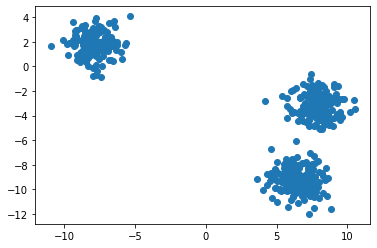

In [30]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

## **Clustering**

### **Import**

In [31]:
from sklearn.cluster import KMeans
import numpy as np

### **Define**

In [32]:
kmeans = KMeans(n_clusters=2, random_state=6)

### **Fit-Predict**

In [33]:
y_clust = kmeans.fit_predict(X)

In [34]:
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

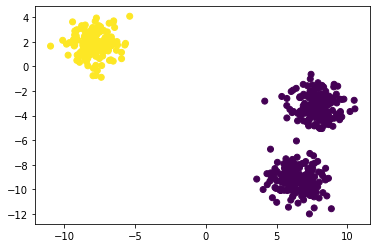

In [35]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

### **3 Cluster**

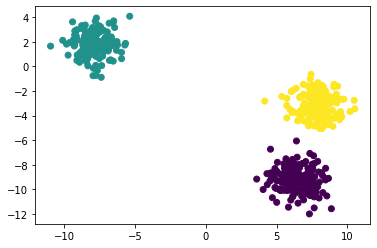

In [36]:
# Define
kmeans = KMeans(n_clusters=3, random_state=6)
# Fit-Predict
y_clust = kmeans.fit_predict(X)
# Plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### **4 Cluster**

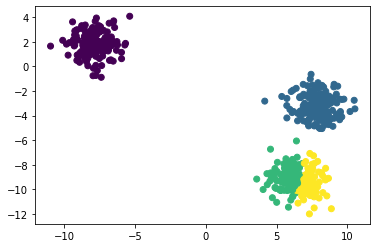

In [37]:
# Define
kmeans = KMeans(n_clusters=4, random_state=0, init= 'random')
# Fit-Predict
y_clust = kmeans.fit_predict(X)
# Plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### **5 Cluster**

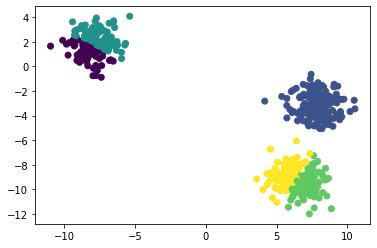

In [38]:
# Define
kmeans = KMeans(n_clusters=5, random_state=14, init= 'random')
# Fit-Predict
y_clust = kmeans.fit_predict(X)
# Plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## **Example Application (Color Quantization)**

In [39]:
import cv2
import os

In [40]:
img = cv2.imread('/content/images.jpg')

In [41]:
img.shape

(175, 288, 3)

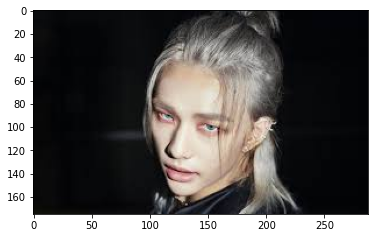

In [42]:
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [43]:
import numpy as np

In [44]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(10350, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [45]:
myquantize = KMeans(n_clusters=16,random_state=6)


### แปลงข้อมูลให้อยู่ในรูป row-column

In [46]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(50400, 3)

In [47]:
final_color = myquantize.fit_predict(img_row)

### ใช้ centroid เป็นตัวแทนของสี

In [48]:
centroid = myquantize.cluster_centers_

In [49]:
centroid

array([[  8.10281182,   8.88183129,  10.65255948],
       [192.44763271, 166.71520803, 149.04160689],
       [ 99.8238342 ,  92.16839378,  87.56649396],
       [221.24850136, 205.33242507, 189.16185286],
       [ 53.72989462,  51.12867443,  50.45036051],
       [175.0757156 , 145.62880886, 129.06740536],
       [142.44392523, 131.67679128, 123.55451713],
       [184.81279398, 180.90404516, 174.55597366],
       [ 76.20681818,  71.21590909,  68.87045455],
       [ 33.5616151 ,  32.51074987,  33.77871002],
       [160.3213966 , 156.39391226, 150.82363474],
       [209.71470588, 186.15705882, 167.88      ],
       [  3.84045208,   4.69235285,   6.77058565],
       [ 15.40256195,  16.28601428,  17.39962201],
       [125.06491372, 112.13804437, 104.32456861],
       [233.25297383, 222.6629659 , 207.81760508]])

In [50]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
     for j in range(RGB_img.shape[1]):
          new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

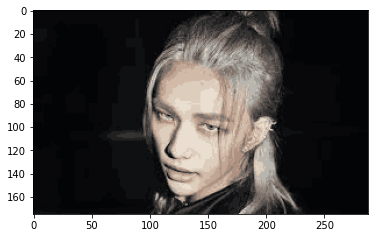

In [51]:
plt.imshow(new_img/255)

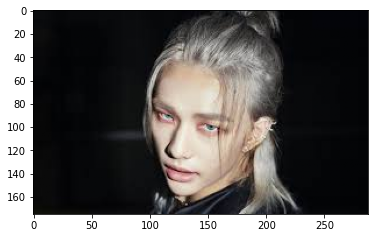

In [52]:
plt.imshow(RGB_img/255)

In [53]:
plt.imsave('img.jpg',new_img/255)